In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import OneHotEncoder
from plotnine import ggplot

In [4]:
data = pd.read_csv("train.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data2= data
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
# Extraer títulos
def extract_title(name):
    parts = name.split(',')
    if len(parts) > 1:
        title = parts[1].split()[0]
        return title
    return None

data['Title'] = data['Name'].apply(extract_title)

print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [10]:
data['Title'].value_counts() # Contar por títulos

,count
Title,
Mr.,517
Miss.,182
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Mlle.,2
Major.,2
Col.,2


In [11]:
data[data['Age'].isna()].groupby('Title').size() # Ver nulos de cada título

,0
Title,
Dr.,1
Master.,4
Miss.,36
Mr.,119
Mrs.,17


In [12]:
# Media y Rangos
grouped = data.groupby('Title')

mean_ages = grouped['Age'].mean()
age_min = grouped['Age'].min()
age_max = grouped['Age'].max()

summary = pd.DataFrame({'Mean Age': mean_ages, 'Min Age': age_min, 'Max Age': age_max})
print(summary)

            Mean Age  Min Age  Max Age
Title                                 
Capt.      70.000000    70.00     70.0
Col.       58.000000    56.00     60.0
Don.       40.000000    40.00     40.0
Dr.        42.000000    23.00     54.0
Jonkheer.  38.000000    38.00     38.0
Lady.      48.000000    48.00     48.0
Major.     48.500000    45.00     52.0
Master.     4.574167     0.42     12.0
Miss.      21.773973     0.75     63.0
Mlle.      24.000000    24.00     24.0
Mme.       24.000000    24.00     24.0
Mr.        32.368090    11.00     80.0
Mrs.       35.898148    14.00     63.0
Ms.        28.000000    28.00     28.0
Rev.       43.166667    27.00     57.0
Sir.       49.000000    49.00     49.0
the        33.000000    33.00     33.0


In [13]:
original_ages = data['Age'].copy()

# Imputación de Datos

## Rellenar con medias

In [ ]:
# Rellenar por medias
mean_ages = data.groupby('Title')['Age'].transform('mean')
data['Age'].fillna(mean_ages, inplace=True)

<ipython-input-42-e636d7b5c0fa>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<ipython-input-42-e636d7b5c0fa>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



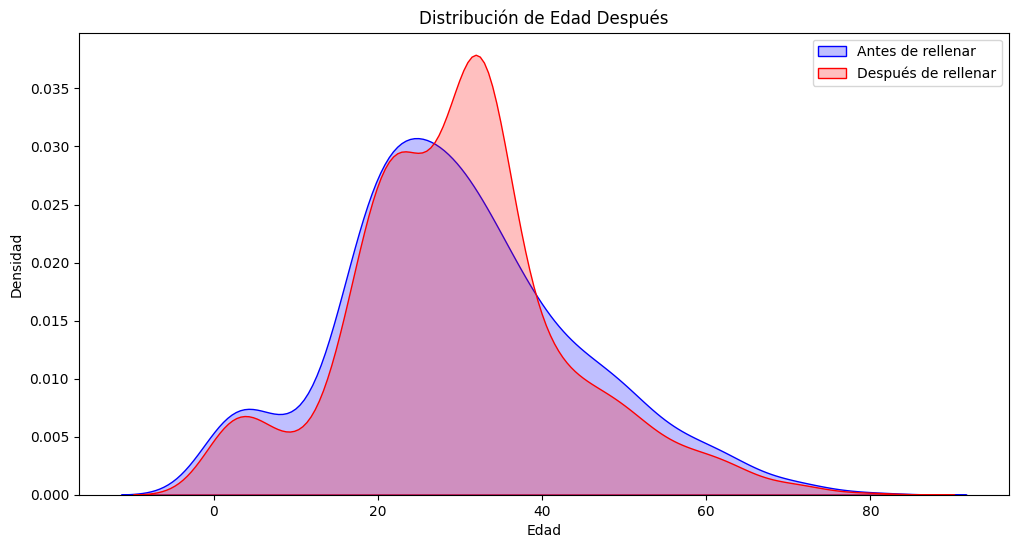

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(original_ages, color='blue', label='Antes de rellenar', shade=True)
sns.kdeplot(data['Age'], color='red', label='Después de rellenar', shade=True)
plt.title('Distribución de Edad Después')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

## Rellenar con Valores dentro del Rango


In [14]:
# Rellenar rango
def fill_na_with_random(data2):
    titles = data2['Title'].unique()  # Obtener todos los títulos únicos
    for title in titles:
        title_mask = data2['Title'] == title  # Filtrar por título
        age_range = data2.loc[title_mask, 'Age'].dropna()

        if not age_range.empty:
            min_age = age_range.min()
            max_age = age_range.max()

            # Generar edades aleatorias uniformemente distribuidas dentro del rango
            data2.loc[title_mask & data2['Age'].isna(), 'Age'] = data2.loc[title_mask & data2['Age'].isna(), 'Age'].apply(
                lambda x: random.uniform(min_age, max_age)
            )

fill_na_with_random(data2)

<ipython-input-15-13d76000c216>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<ipython-input-15-13d76000c216>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



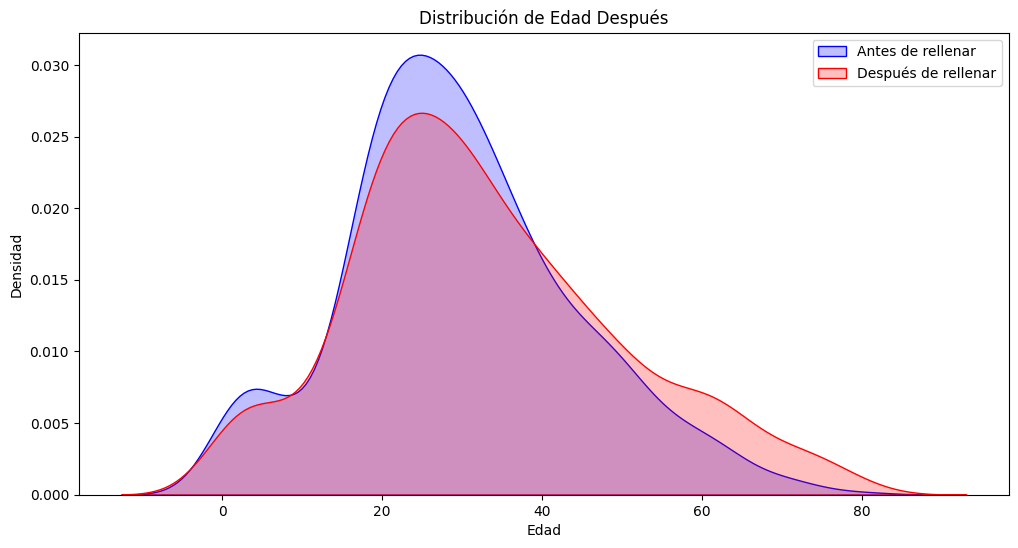

In [15]:
plt.figure(figsize=(12, 6))
sns.kdeplot(original_ages, color='blue', label='Antes de rellenar', shade=True)
sns.kdeplot(data2['Age'], color='red', label='Después de rellenar', shade=True)
plt.title('Distribución de Edad Después')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Transformación de datos categóricos y eliminación de columnas


In [16]:
data2['Gender'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0) # male - 1  |  female - 0
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Rev.,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss.,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,59.615702,1,2,W./C. 6607,23.4500,NaN,S,Miss.,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr.,1


In [17]:
dumm = pd.get_dummies(data["Embarked"], dtype ="int")
dumm

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [18]:
# C = Cherbourg, Q = Queenstown, S = Southampton
data2 = pd.concat([data2.drop("Embarked", axis = 1), dumm], axis = 1)

In [19]:
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Gender,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Mr.,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Mrs.,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss.,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Mrs.,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Mr.,1,0,0,1


In [20]:
Family = data2["SibSp"]	+ data2["Parch"]
Family

,0
0,1
1,1
2,0
3,1
4,0
...,...
886,0
887,0
888,3
889,0


In [21]:
data2["Family"] = Family
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Gender,C,Q,S,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,Mr.,1,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,Mrs.,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,Miss.,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,Mrs.,0,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,Mr.,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,Rev.,1,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,Miss.,0,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,59.615702,1,2,W./C. 6607,23.4500,NaN,Miss.,0,0,0,1,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,Mr.,1,1,0,0,0


In [ ]:
#data2 = pd.concat([data2.drop(["SibSp", "Parch"], axis = 1), Family], axis = 1)

In [23]:
data2 = data2.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Sex", "Title", "SibSp", "Parch" ])
data2

,Survived,Pclass,Age,Fare,Gender,C,Q,S,Family
0,0,3,22.000000,7.2500,1,0,0,1,1
1,1,1,38.000000,71.2833,0,1,0,0,1
2,1,3,26.000000,7.9250,0,0,0,1,0
3,1,1,35.000000,53.1000,0,0,0,1,1
4,0,3,35.000000,8.0500,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,1,0,0,1,0
887,1,1,19.000000,30.0000,0,0,0,1,0
888,0,3,59.615702,23.4500,0,0,0,1,3
889,1,1,26.000000,30.0000,1,1,0,0,0


# Matríz de Correlación

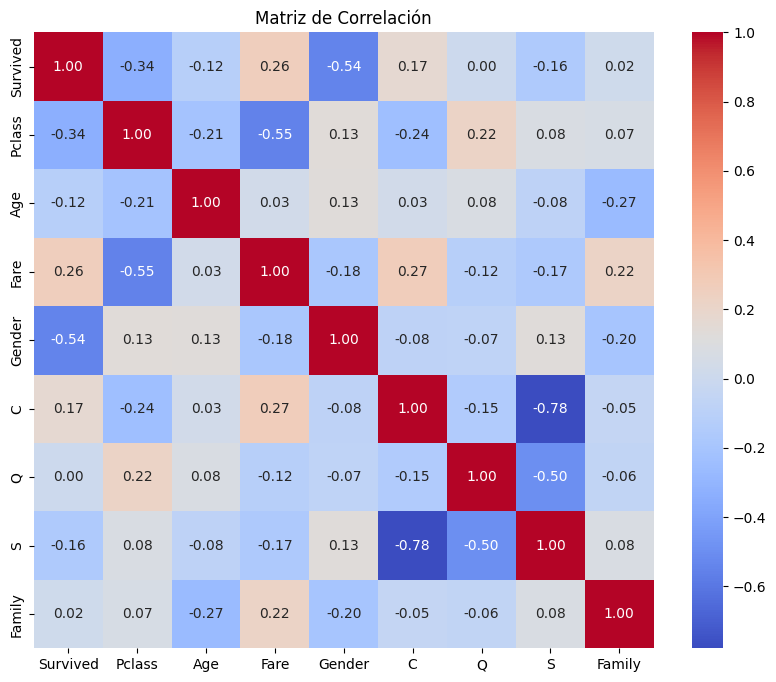

In [24]:
matrix = data2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Survival Rate

In [31]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
data2['AgeRange'] = pd.cut(data2['Age'], bins=age_bins, labels=age_labels, right=False)
survival_rate = data2.groupby('AgeRange')['Survived'].mean()
print(survival_rate)
data2 = data2.drop(columns="AgeRange")

AgeRange
0-10     0.626866
11-20    0.371901
21-30    0.356846
31-40    0.421053
41-50    0.338843
51-60    0.418919
61-70    0.274510
71-80    0.080000
Name: Survived, dtype: float64


<ipython-input-31-e5a600fa04d5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [29]:
survival_rate_embarked_S = data2.groupby('S')['Survived'].mean()
print(survival_rate_embarked_S)
survival_rate_embarked_Q = data2.groupby('Q')['Survived'].mean()
print(survival_rate_embarked_Q)
survival_rate_embarked_C = data2.groupby('C')['Survived'].mean()
print(survival_rate_embarked_C)

S
0    0.506073
1    0.336957
Name: Survived, dtype: float64
Q
0    0.383292
1    0.389610
Name: Survived, dtype: float64
C
0    0.344398
1    0.553571
Name: Survived, dtype: float64


In [33]:
survival_rate_Gender = data2.groupby('Gender')['Survived'].mean()
print(survival_rate_Gender)

Gender
0    0.742038
1    0.188908
Name: Survived, dtype: float64


# Gráficas - Sobrevivientes

In [ ]:
#Sobrevivientes
data2.groupby("gender")["Survived"].sum()

,Survived
gender,
0,233
1,109


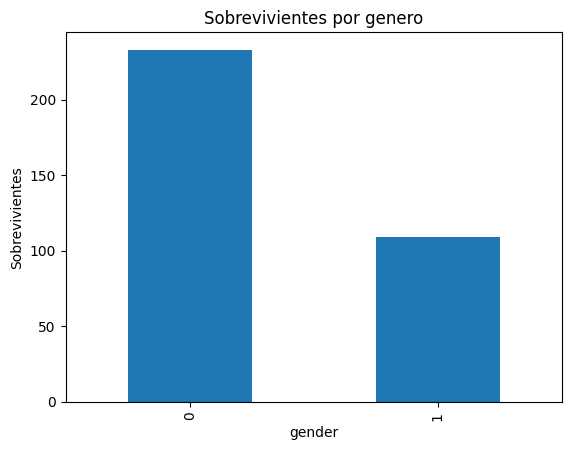

In [ ]:
data2.groupby("gender")["Survived"].sum().plot(kind='bar')
plt.ylabel('Sobrevivientes')
plt.title('Sobrevivientes por genero')
plt.show()

In [ ]:
#No sobrevivieron
data2[data2["Survived"] == 0].groupby("gender").size()

gender
0     81
1    468
dtype: int64

In [ ]:
data2.groupby("Pclass")["Survived"].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

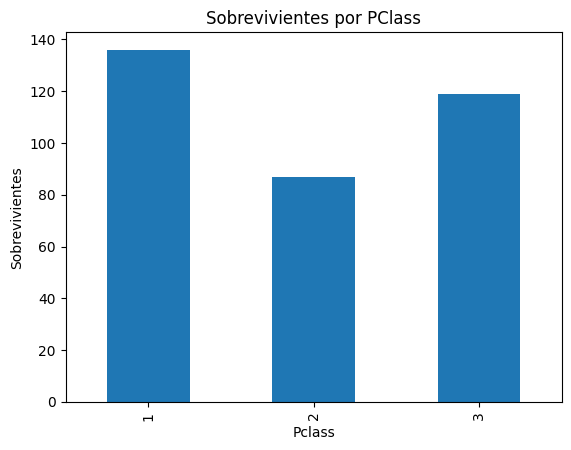

In [ ]:
data2.groupby("Pclass")["Survived"].sum().plot(kind='bar')
plt.ylabel('Sobrevivientes')
plt.title('Sobrevivientes por PClass')
plt.show()

In [ ]:
data2.groupby("Embarked")["Survived"].sum()

,Survived
Embarked,
C,93
Q,30
S,217


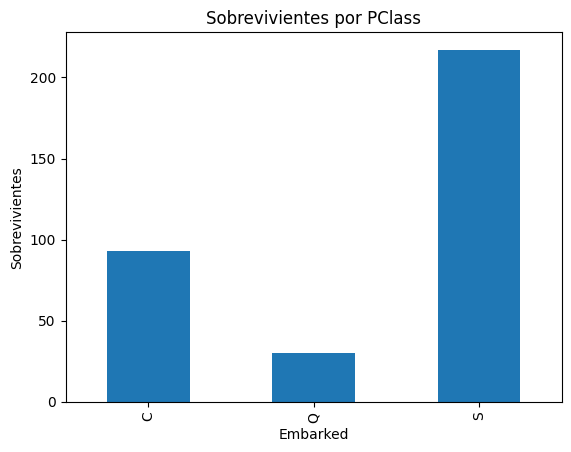

In [ ]:
data2.groupby("Embarked")["Survived"].sum().plot(kind='bar')
plt.ylabel('Sobrevivientes')
plt.title('Sobrevivientes por PClass')
plt.show()

In [ ]:
data2.groupby("Fare")["Survived"].sum()

,Survived
Fare,
0.0000,1
4.0125,0
5.0000,0
6.2375,0
6.4375,0
...,...
227.5250,3
247.5208,1
262.3750,2


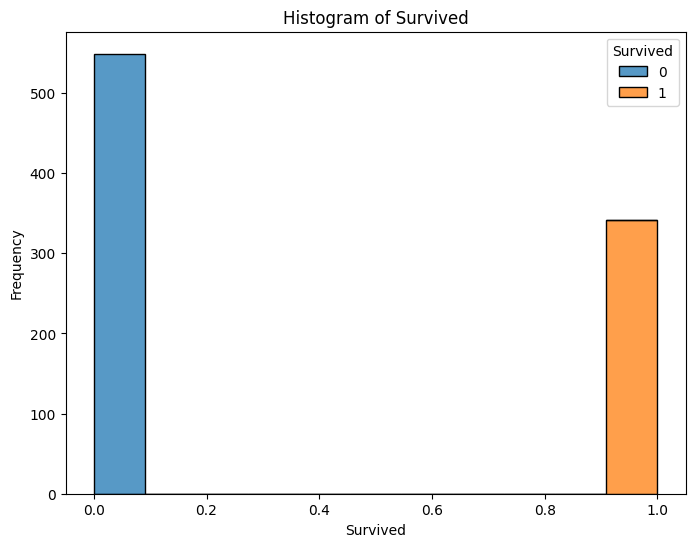

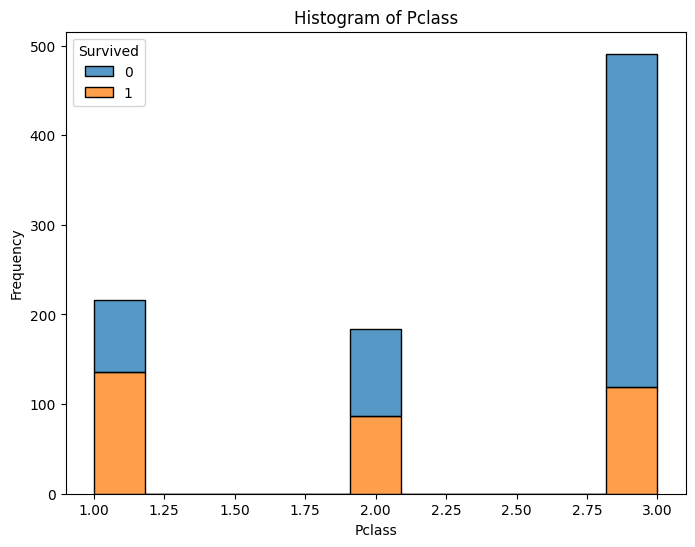

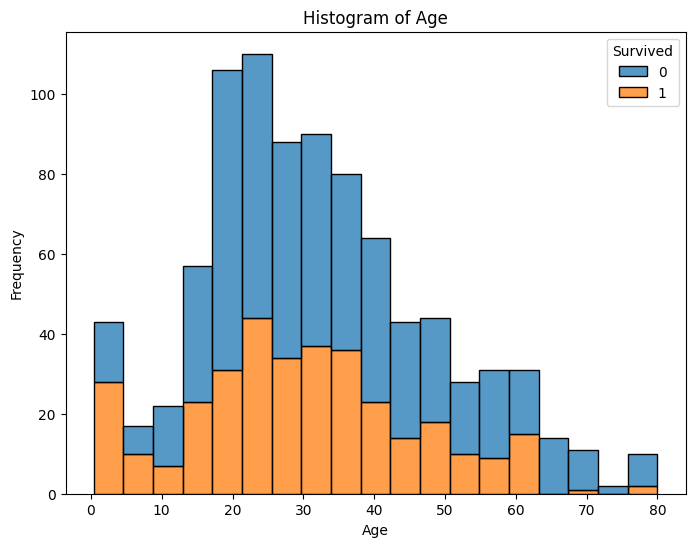

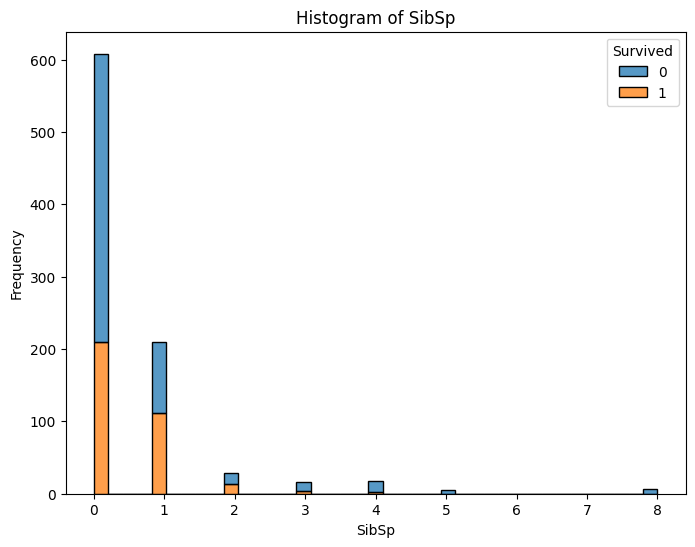

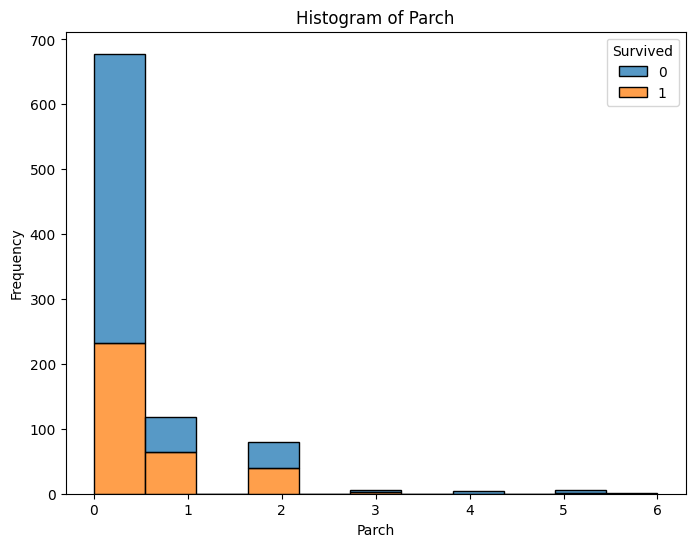

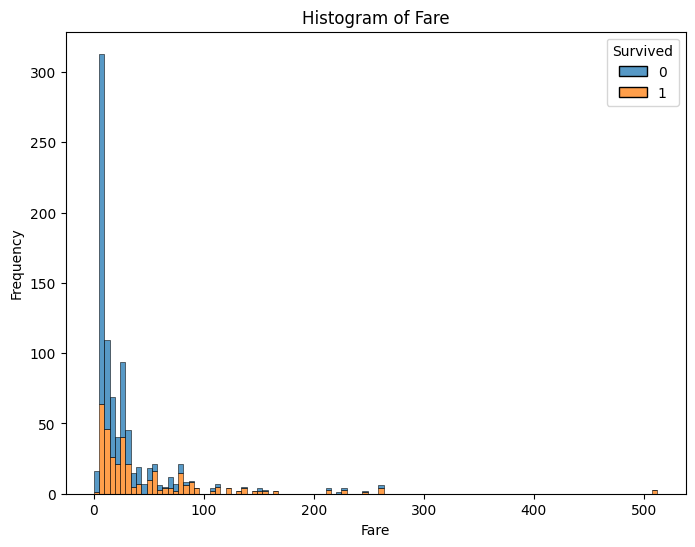

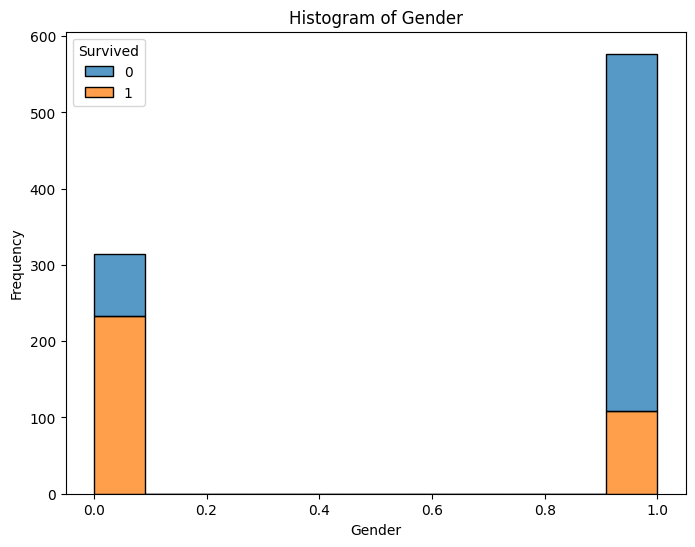

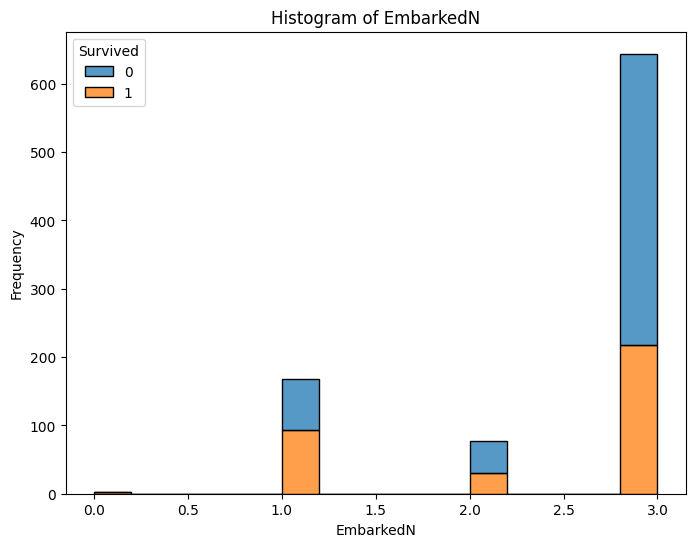

In [ ]:
for col in data2.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data2, x = col, hue = 'Survived', multiple='stack' )
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Primer Modelo Predictivo

In [ ]:
# Armar el primer modelo predictivo

# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [0,0]
theta_nuevo = theta.copy()
# Cargar el valor del learning rate (alpha)
alpha = 0.001

# Crear función lambda para la función de hipótesis
prediccion = lambda b,m,x: 1/(np.exp(-(b + m*x)))

# Calcular el total de muestras a partir de los datos (n)
n = len(data2)

# Separar datos en grupo de entrenamiento y de prueba
np.random.seed(20)

# Revolver el dataframe
datos_revueltos = data2.sample(frac=1).reset_index(drop=True)

# Indice para separar los datos
indice = int(n * 0.7)

# Separar en los dos grupos
training = datos_revueltos[:indice].copy()
test = datos_revueltos[indice:].copy()

In [ ]:
i = 1
converge1 = 1
converge2 = 1
n = len(training)

# Se entrena el modelo hasta que los valores de theta converjan o hasta que se alcance el limite de iteraciones
while (converge1 > 1e-6 or converge2 > 1e-6) and i < 1000000:
  i = i + 1
  theta_nuevo[0] = theta[0] - alpha*(1/n)*np.sum(prediccion(theta[0], theta[1], training['Gender']) - training['Survived'])
  theta_nuevo[1] = theta[1] - alpha*(1/n)*np.sum((prediccion(theta[0], theta[1], training['Gender']) - training['Survived'])*training['Gender'])
  converge1 = abs(theta_nuevo[0] - theta[0])
  converge2 = abs(theta_nuevo[1] - theta[1])
  theta = theta_nuevo.copy()

print('Iteraciones:', i)
print('theta0 =', round(theta[0], 2))
print('theta1 =', round(theta[1], 2))

Iteraciones: 55567
theta0 = -0.31
theta1 = -1.3


In [ ]:
# Se añade una columna para tener las predicciones
test['Prediccion'] = round(prediccion(theta[0], theta[1], test['Gender']))
test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,EmbarkedN,AgeRange,Prediccion
623,0,3,61.000000,0,0,6.2375,1,3,61-70,0.0
624,0,3,33.000000,1,1,20.5250,1,3,31-40,0.0
625,0,3,19.402991,1,0,14.4542,0,1,11-20,1.0
626,1,1,21.034104,1,0,82.1708,0,1,21-30,1.0
627,1,3,5.000000,2,1,19.2583,0,1,0-10,1.0


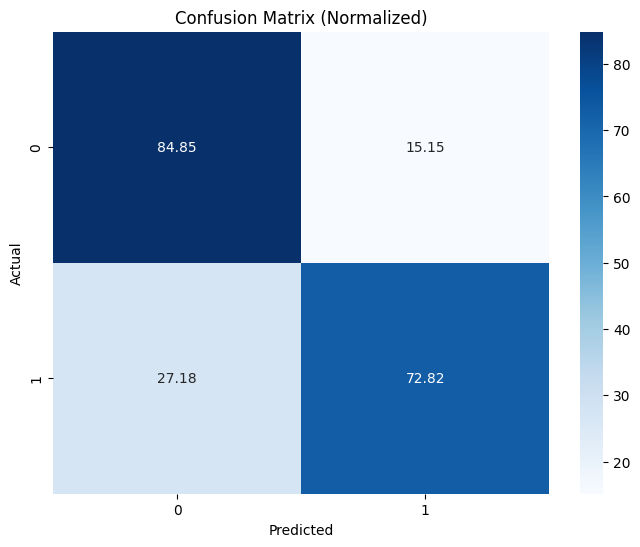

In [ ]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix
# Assuming y_true and y_pred are your actual and predicted values
cm = confusion_matrix(test['Survived'], test['Prediccion'])

# Normalize the confusion matrix to get percentages
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Normalized)')
plt.show()

In [ ]:
test_Titanic = pd.read_csv('test.csv')
test_Titanic['Gender'] = test_Titanic['Sex'].map({'female': 1, 'male': 0})
test_Titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
kaggle_submit = test_Titanic[['PassengerId']].copy()
kaggle_submit['Survived'] = round(prediccion(theta[0], theta[1], test_Titanic['Gender'])).astype(int)
kaggle_submit.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,1
4,896,0
